<a href="https://colab.research.google.com/github/Yuri814/AIpython/blob/main/250604%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **문제 1) 데이터셋 로딩 및 초기 탐색**

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#1-1 시본(seaborn)에서 제공하는 펭귄(Penguins) 데이터셋 로드하기
penguins = sns.load_dataset('penguins')

In [4]:
#1-2 첫 5행 데이터 확인
print(f'첫 5행 데이터:\n, {penguins.head()}')

첫 5행 데이터:
,   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [5]:
#1-3 데이터의 기본 정보 확인
print(f'데이터 기본 정보: {penguins.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
데이터 기본 정보: None


In [6]:
#1-4 데이터셋의 크기 확인
print(f'데이터셋 크기: {penguins.shape}')

데이터셋 크기: (344, 7)


In [7]:
#1-5 기본통계량 확인
print(f'기본통계량: {penguins.describe()}')

기본통계량:        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


# **문제 2) 데이터 전처리 및 품질 관리**

In [8]:
#2-1 컬럼별로 결측치 개수 확인
print(f'컬럼별 결측치 개수: {penguins.isnull().sum()}')

컬럼별 결측치 개수: species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [9]:
#2-2 결측치가 있는 행의 갯수 확인
print(f'결측치가 있는 행의 수: {penguins.isnull().any(axis=1).sum()}')

결측치가 있는 행의 수: 11


In [10]:
#2-3 수치형 변수에 대한 이상치 확인 (IQR 방법)
def detect_outliers(df, columns):
    outliers = pd.DataFrame(False, index=df.index, columns=columns)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = (df[col] < lower) | (df[col] > upper)
    return outliers

numeric_cols = penguins.select_dtypes(include=[np.number]).columns.tolist()
outliers = detect_outliers(penguins, numeric_cols)
outlier_rows = outliers.any(axis=1)
print("이상치가 있는 행의 수:", outlier_rows.sum())

이상치가 있는 행의 수: 0


In [14]:
#2-4 이상치 행 제거
penguins_clean = penguins[~outlier_rows].dropna()

In [16]:
#2-5 이상치 제거 전 데이터 크기와 이상치 제거 후 데이터 크기를 확인
print(f'이상치 제거 전: {penguins.shape}')
print(f'이상치 및 결측치 제거 후: {penguins_clean.shape}')

이상치 제거 전: (344, 7)
이상치 및 결측치 제거 후: (333, 7)


In [17]:
#2-6 중복 데이터 확인 및 처리(발견 여부를 확인하고 발견되면 제거하고, 아니면 "중복 데이터가 발견되지 않았습니다." 라고 출력한다
duplicates = penguins_clean.duplicated()
if duplicates.any():
    print("중복 데이터 발견됨. 제거합니다.")
    penguins_clean = penguins_clean[~duplicates]
else:
    print("중복 데이터가 발견되지 않았습니다.")

중복 데이터가 발견되지 않았습니다.


# **문제 3) 그룹화 및 집계 분석**

In [20]:
#3-1 펭귄 종(species)별로 그룹화하여 각 그룹별로 수치형 변수에 대한 평균 확인
numeric_sp_cols = penguins_clean.select_dtypes(include='number').columns.tolist()
sp_group_mean = penguins_clean.groupby('species')[numeric_sp_cols].mean()
print(f'종별 수치형 변수 평균: {sp_group_mean}')

종별 수치형 변수 평균:            bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
species                                                                 
Adelie          38.823973      18.347260         190.102740  3706.164384
Chinstrap       48.833824      18.420588         195.823529  3733.088235
Gentoo          47.568067      14.996639         217.235294  5092.436975


In [21]:
#3-2 서식지(island)별 펭귄 종(species)별로 분포를 확인 ( .crosstab() 메소드)
sp_island = pd.crosstab(penguins_clean['island'], penguins_clean['species'])
print(f'서식지별 펭귄 종 분포: {sp_island}')

서식지별 펭귄 종 분포: species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     119
Dream          55         68       0
Torgersen      47          0       0


# **문제 4) 데이터 시각화**

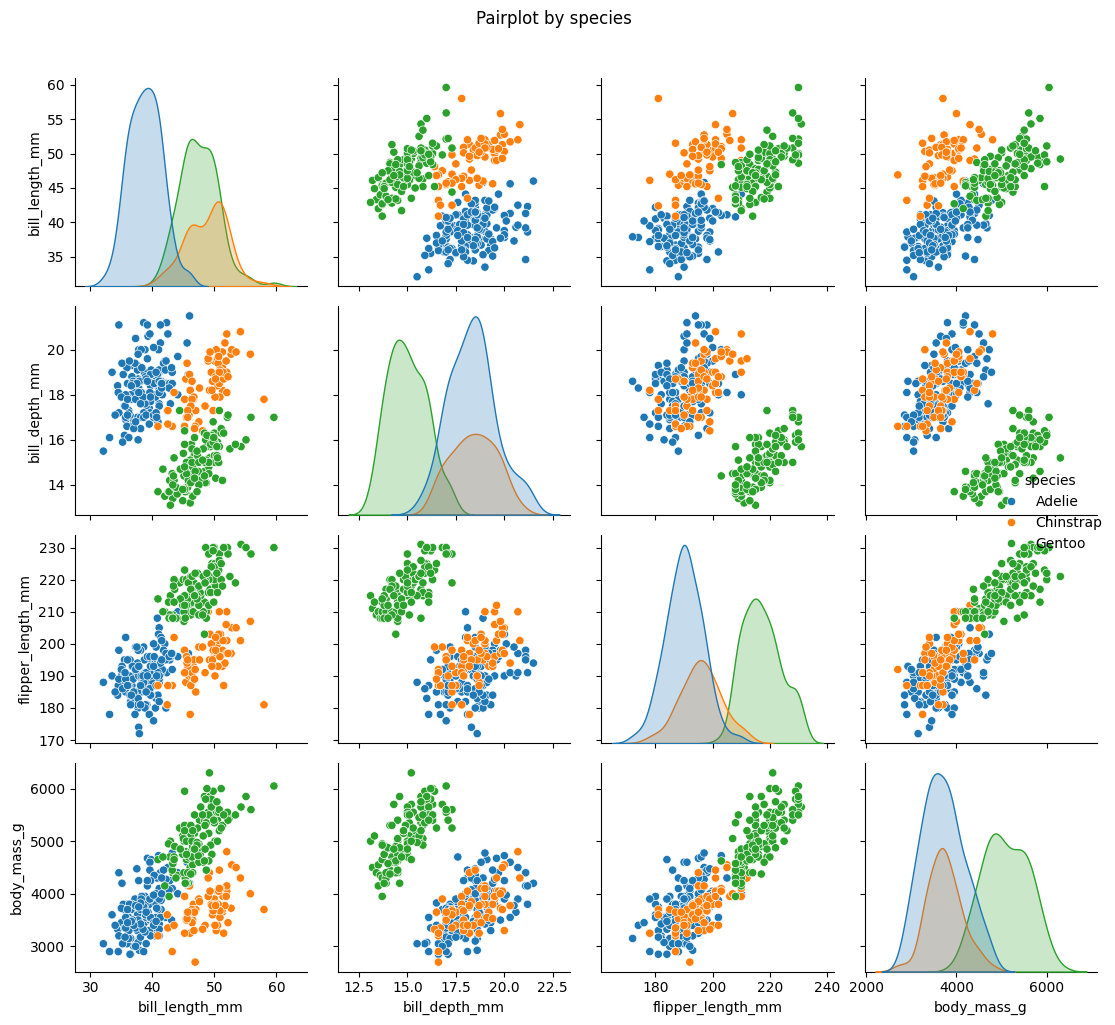

In [23]:
#4-1 종(species)별 특성 간 산점도 매트릭스 표시 ( .pairplot() 메소드)
sns.pairplot(penguins_clean, hue='species')
plt.suptitle("Pairplot by species", y=1.02)
plt.tight_layout()
plt.show()

# **문제 5) 머신러닝 모델 구축 및 성능 평가**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
#5-1 훈련데이터, 테스터데이터 분할
X = penguins_clean.select_dtypes(include='number')  # 수치형 변수만 사용
y = penguins_clean['species']  # target은 species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

훈련 데이터 크기: (233, 4), 테스트 데이터 크기: (100, 4)


In [26]:
#5-2 결정 트리(DecisionTreeClassifier) 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print(f"결정 트리 모델 학습 완료")

결정 트리 모델 학습 완료


In [27]:
#5-3 모델을 이용한 예측 수행
y_pred = model.predict(X_test)
print(f"예측 완료")

예측 완료


In [28]:
#5-4 모델 성능 평가 수행
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")
print(f"분류 리포트:\n{classification_report(y_test, y_pred)}")

모델 정확도: 0.9800
분류 리포트:
              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        48
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100

